# Data mining with python

### Contents
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Using ML Models

### Data dict
VariableDefinitionKey 
* **survival** Survival 0 = No, 1 = Yes 
* **pclass** Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
* **sex** Sex 
* **age** Age in years 
* **sibsp** # of siblings / spouses aboard the Titanic parch # of parents / * children aboard the Titanic 
* **ticket** Ticket number 
* **fare** Passenger fare 
* **cabin** Cabin number 
* **embarked** Port * of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

## 1. import necessary library

In [294]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import graphviz
from sklearn import tree, metrics


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 2. Read In and Explore the Data

In [295]:
# get titanic & test csv files as a DataFrame
df = pd.read_csv("./titanic_data_set/train.csv")

# preview the data
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [296]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andersson, Master. Sigvard Harald Elias",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3. Data Analysis

In [297]:
print(df.columns, '\n', df.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 
 (891, 12)


In [298]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
601,602,0,3,"Slabenoff, Mr. Petco",male,NaN,0,0,349214,7.8958,NaN,S


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

In [300]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Some Predictions:
* Sex: Females are more likely to survive.
* SibSp/Parch: People traveling alone are more likely to survive.
* Age: Young children are more likely to survive.
* Pclass: People of higher socioeconomic class are more likely to survive.

## 4. Data Visualization

### Pclass Feature

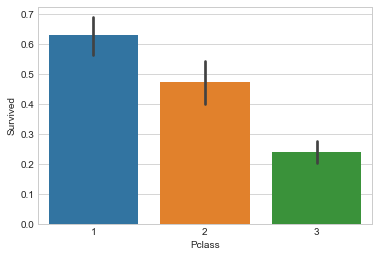

In [301]:
sns.barplot(df['Pclass'], df['Survived'], data=df)

### Sex Feature

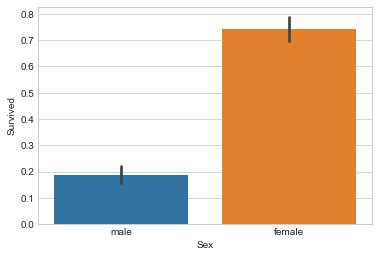

In [302]:
sns.barplot(df['Sex'], df['Survived'], data=df)

### Age Feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Age    714 non-null float64
dtypes: float64(1)
memory usage: 7.0 KB
None


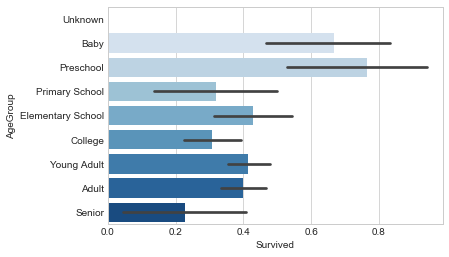

In [303]:
print(df[['Age']].info())
df['Age'] = df['Age'].astype(float)
bins = [-1, 0, 3, 6, 12, 18, 23, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Preschool', 'Primary School', 'Elementary School', 'College', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# sns.barplot(df['AgeGroup'], df['Survived'], data=df)
#draw a bar plot of Age vs. survival
sns.barplot(df['Survived'], df['AgeGroup'], data=df, palette='Blues')
plt.show()

### SibSp Feature

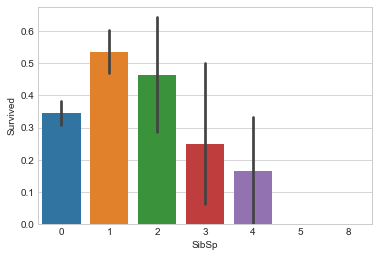

In [304]:
sns.barplot(df['SibSp'], df['Survived'], data=df)

### Parch Feature

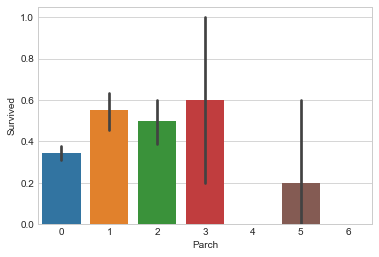

In [305]:
sns.barplot(df['Parch'], df['Survived'], data=df)

### Fare Feature

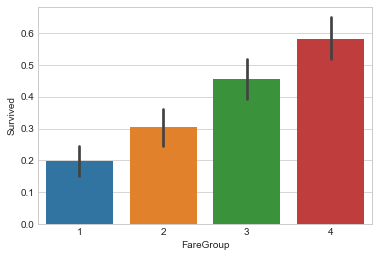

In [306]:
labels = [1, 2, 3, 4]
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=labels)

sns.barplot(df['FareGroup'], df['Survived'], data=df)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       714 non-null category
FareGroup      891 non-null category
dtypes: category(2), float64(2), int64(5), object(5)
memory usage: 85.9+ KB


### Cabin Feature

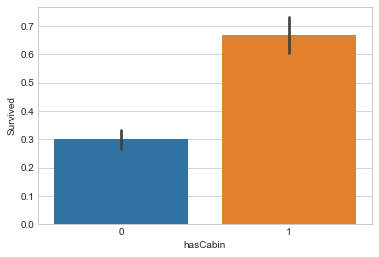

In [308]:
df['hasCabin'] = df['Cabin'].notnull().astype(int)

sns.barplot(df['hasCabin'], df['Survived'], data=df)

### Embark Feature

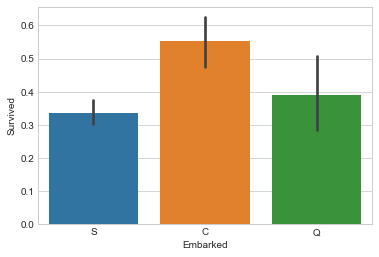

In [309]:
sns.barplot(df['Embarked'], df['Survived'], data=df)

## 5. Cleaning Data

### Find null values

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       714 non-null category
FareGroup      891 non-null category
hasCabin       891 non-null int64
dtypes: category(2), float64(2), int64(6), object(5)
memory usage: 92.9+ KB


### Pclass Feature

### Sex Feature

In [311]:
df.Sex = (df.Sex.values == 'male').astype(int)
df['Sex'].head()
# Male = 1, Female = 0

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

### Age Feature

In [314]:
#extract a title for each Name in the train and test datasets
for dataset in df:
#     dataset['Title'] = dataset..extract(' ([A-Za-z]+)\.', expand=False)
    print(dataset.Name)
# df['Title']


AttributeError: 'str' object has no attribute 'Name'

In [245]:
df['Age'] = df['Age'].astype(float)
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)

ValueError: Bin labels must be one fewer than the number of bin edges

### SibSp Feature

In [ ]:
sns.barplot(df['SibSp'], df['Survived'], data=df)

### Parch Feature

In [ ]:
sns.barplot(df['Parch'], df['Survived'], data=df)

### Fare Feature

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       714 non-null category
FareGroup      891 non-null category
hasCabin       891 non-null int64
dtypes: category(2), float64(2), int64(7), object(4)
memory usage: 92.9+ KB


In [259]:
#map Fare values into groups of numerical values
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels = [1, 2, 3, 4])
df[['Fare', 'FareGroup']].sample(10)

,Fare,FareGroup
84,10.5000,2
478,7.5208,1
211,21.0000,3
268,153.4625,4
390,120.0000,4
568,7.2292,1
299,247.5208,4
109,24.1500,3
315,7.8542,1
123,13.0000,2


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       714 non-null category
FareGroup      891 non-null category
hasCabin       891 non-null int64
dtypes: category(2), float64(2), int64(7), object(4)
memory usage: 92.9+ KB


### Cabin Feature

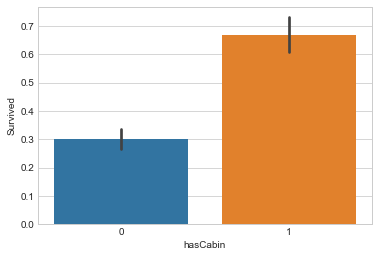

In [260]:
sns.barplot(df['hasCabin'], df['Survived'], data=df)

### Embark Feature

In [272]:
# map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

df.sample(5)

# Southampton : 1
# Cherbourg : 2
# Queenstown : 3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,hasCabin
139,140,0,1,"Giglio, Mr. Victor",1,24.0,0,0,PC 17593,79.2000,B86,NaN,Young Adult,4,1
223,224,0,3,"Nenkoff, Mr. Christo",1,NaN,0,0,349234,7.8958,NaN,NaN,NaN,1,0
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",1,31.0,0,0,C.A. 18723,10.5000,NaN,NaN,Young Adult,2,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,NaN,Young Adult,2,0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",0,19.0,1,0,350046,7.8542,NaN,NaN,College,1,0


In [267]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'FareGroup',
       'hasCabin'],
      dtype='object')

### Drop unneeded columns

In [145]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
df = df.drop(['PassengerId','Name','Ticket', 'Fare'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,AgeGroup,FareGroup,hasCabin
0,0,3,1,22.0,1,0,NaN,S,College,1,0
1,1,1,0,38.0,1,0,C85,C,Adult,1,1
2,1,3,0,26.0,0,0,NaN,S,Young Adult,1,0
3,1,1,0,35.0,1,0,C123,S,Young Adult,1,1
4,0,3,1,35.0,0,0,NaN,S,Young Adult,1,0


In [146]:
mean_age = np.mean(df.Age)
df = df.fillna({'Age': mean_age})

## 6. Using ML Models

### split data

In [147]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train = X.loc[0:701]
X_test = X.loc[701:]
y_train = y.loc[0:701]
y_test = y.loc[701:]

In [148]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,AgeGroup,FareGroup,hasCabin
0,3,1,22.0,1,0,NaN,S,College,1,0
1,1,0,38.0,1,0,C85,C,Adult,1,1
2,3,0,26.0,0,0,NaN,S,Young Adult,1,0
3,1,0,35.0,1,0,C123,S,Young Adult,1,1
4,3,1,35.0,0,0,NaN,S,Young Adult,1,0


In [149]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [150]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,AgeGroup,FareGroup,hasCabin
701,1,1,35.0,0,0,E24,S,Young Adult,1,1
702,3,0,18.0,0,1,NaN,C,Elementary School,1,0
703,3,1,25.0,0,0,NaN,Q,Young Adult,1,0
704,3,1,26.0,1,0,NaN,S,Young Adult,1,0
705,2,1,39.0,0,0,NaN,S,Adult,1,0


In [151]:
y_test.head()

701    1
702    0
703    0
704    0
705    0
Name: Survived, dtype: int64

### fit data in decision tree

In [152]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 10 columns):
Pclass       702 non-null int64
Sex          702 non-null int64
Age          702 non-null float64
SibSp        702 non-null int64
Parch        702 non-null int64
Cabin        159 non-null object
Embarked     701 non-null object
AgeGroup     557 non-null category
FareGroup    702 non-null category
hasCabin     702 non-null int64
dtypes: category(2), float64(1), int64(5), object(2)
memory usage: 45.9+ KB


In [153]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 701 to 890
Data columns (total 10 columns):
Pclass       190 non-null int64
Sex          190 non-null int64
Age          190 non-null float64
SibSp        190 non-null int64
Parch        190 non-null int64
Cabin        46 non-null object
Embarked     189 non-null object
AgeGroup     158 non-null category
FareGroup    190 non-null category
hasCabin     190 non-null int64
dtypes: category(2), float64(1), int64(5), object(2)
memory usage: 12.9+ KB


In [154]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'Young Adult'

In [ ]:
y_pred = classifier.predict(X_test)

### confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nprecision = ' + str((cm[0][0] + cm[1][1])/ (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
X_train.columns

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=X_train.columns,
                         class_names=['Died', 'Survived'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)  
graph.render("graphviz") 
graph


### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))


##### 